# Academy Award for Best Picture Prediction: Data Exploration
---

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization   
> Plotly : High-level library for Interactive Graphics  
> Scikit-learn : Machine Learning Library

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.pyplot import figure
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as pw
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MultiLabelBinarizer

### Read the dataset

In [2]:
#import file
df = pd.read_csv('data/movie_dataset_final.csv')
df.head()

Year            Movie  Oscar_winner  Oscar_nominee  Runtime (min)  \
0  1999       Fight Club             0              0            139   
1  1999       The Matrix             0              0            136   
2  1999   The Green Mile             0              1            189   
3  1999  American Beauty             1              1            122   
4  1999  The Sixth Sense             0              1            107   

  Certificate                       Directors  \
0        R(A)                   David Fincher   
1          PG  Lana Wachowski Lilly Wachowski   
2        R(A)                  Frank Darabont   
3        R(A)                      Sam Mendes   
4          PG              M. Night Shyamalan   

                                              Actors  Metascore  IMDb_rating  \
0  ['Brad Pitt', 'Edward Norton', 'Meat Loaf', 'Z...         66          8.8   
1  ['Keanu Reeves', 'Laurence Fishburne', 'Carrie...         73          8.7   
2  ['Tom Hanks', 'Michael Clarke Duncan', 'David ...         61          8.6   
3  ['Kevin Spacey', 'Annette Bening', 'Thora Birc...         84          8.3   
4  ['Bruce Willis', 'Haley Joel Osment', 'Toni Co...         64          8.1   

   ...  Golden_Bear_winner  Golden_Bear_nominee  Golden_Lion_winner  \
0  ...                   0                    0                   0   
1  ...                   0                    0                   0   
2  ...                   0                    0                   0   
3  ...                   0                    0                   0   
4  ...                   0                    0                   0   

   Golden_Lion_nominee  PCA_winner  PCA_nominee  NYFCC_winner NYFCC_nominee  \
0                    0           0            0             0             0   
1                    0           0            0             0             0   
2                    0           0            0             0             0   
3                    0           1            1             0             1   
4                    0           0            0             0             0   

   OFCS_winner  OFCS_nominee  
0            0             1  
1            0             0  
2            0             0  
3            1             1  
4            0             0  

[5 rows x 61 columns]

To understand the sort of data we will be processing we need to know the data types of each of the columns, which is listed as below:

In [3]:
df.dtypes

Year              int64
Movie            object
Oscar_winner      int64
Oscar_nominee     int64
Runtime (min)     int64
                  ...  
PCA_nominee       int64
NYFCC_winner      int64
NYFCC_nominee     int64
OFCS_winner       int64
OFCS_nominee      int64
Length: 61, dtype: object

For award nominations and wins (eg: BAFTA, Golden Lion Award etc), the int64 datatype can be misleading as they resemble more closely to Boolean values than integers as they are only "0" and "1".

Now let's look at the features of the dataset, the list of variables we will be using in our prediction algorithms.

In [4]:
feature1 = df.iloc[:,2:5]
feature2 = df.iloc[:,8:17]
feature3 = df.iloc[:,18:61]
features = pd.concat([feature1, feature2, feature3], axis=1, join='inner')
feature_list = list(features.columns)
feature_list

['Oscar_winner',
 'Oscar_nominee',
 'Runtime (min)',
 'Metascore',
 'IMDb_rating',
 'IMDb_votes',
 'RT_rating',
 'RT_review',
 'Budget',
 'Domestic (US) gross',
 'International gross',
 'Worldwide gross',
 'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western',
 'BAFTA_winner',
 'BAFTA_nominee',
 'DGA_winner',
 'DGA_nominee',
 'GG_comedy_winner',
 'GG_comedy_nominee',
 'GG_drama_winner',
 'GG_drama_nominee',
 'PGA_winner',
 'PGA_nominee',
 'CCMA_winner',
 'CCMA_nominee',
 'Golden_Palm_winner',
 'Golden_Palm_nominee',
 'Golden_Bear_winner',
 'Golden_Bear_nominee',
 'Golden_Lion_winner',
 'Golden_Lion_nominee',
 'PCA_winner',
 'PCA_nominee',
 'NYFCC_winner',
 'NYFCC_nominee',
 'OFCS_winner',
 'OFCS_nominee']

The shape of our features is also important in understanding features usage

In [5]:
features.shape

(2100, 55)

One helpful list of statistics is provided by using describe and the data is as follows -

In [6]:
df.describe()

Year  Oscar_winner  Oscar_nominee  Runtime (min)    Metascore  \
count  2100.000000   2100.000000    2100.000000    2100.000000  2100.000000   
mean   2009.000952      0.010000       0.070000     113.255238    57.273333   
std       6.056350      0.099522       0.255208      19.353722    18.893209   
min    1999.000000      0.000000       0.000000      75.000000     0.000000   
25%    2004.000000      0.000000       0.000000      99.000000    45.000000   
50%    2009.000000      0.000000       0.000000     110.000000    58.000000   
75%    2014.000000      0.000000       0.000000     124.000000    71.000000   
max    2019.000000      1.000000       1.000000     224.000000   100.000000   

       IMDb_rating    IMDb_votes    RT_rating    RT_review        Budget  ...  \
count  2100.000000  2.100000e+03  2100.000000  2100.000000  2.100000e+03  ...   
mean      6.782952  2.006128e+05    60.713810   166.656667  5.680988e+07  ...   
std       0.864869  2.000501e+05    25.519127    77.845156  5.588360e+07  ...   
min       1.400000  2.714300e+04     0.000000     0.000000  0.000000e+00  ...   
25%       6.200000  8.522700e+04    40.000000   117.000000  1.700000e+07  ...   
50%       6.800000  1.305940e+05    65.000000   161.000000  4.000000e+07  ...   
75%       7.400000  2.367292e+05    83.000000   209.250000  8.000000e+07  ...   
max       9.000000  2.191307e+06   100.000000   551.000000  3.790000e+08  ...   

       Golden_Bear_winner  Golden_Bear_nominee  Golden_Lion_winner  \
count         2100.000000          2100.000000         2100.000000   
mean             0.000952             0.015238            0.002381   
std              0.030853             0.122528            0.048748   
min              0.000000             0.000000            0.000000   
25%              0.000000             0.000000            0.000000   
50%              0.000000             0.000000            0.000000   
75%              0.000000             0.000000            0.000000   
max              1.000000             1.000000            1.000000   

       Golden_Lion_nominee   PCA_winner  PCA_nominee  NYFCC_winner  \
count          2100.000000  2100.000000  2100.000000   2100.000000   
mean              0.026190     0.007619     0.014286      0.009524   
std               0.159739     0.086975     0.118694      0.097147   
min               0.000000     0.000000     0.000000      0.000000   
25%               0.000000     0.000000     0.000000      0.000000   
50%               0.000000     0.000000     0.000000      0.000000   
75%               0.000000     0.000000     0.000000      0.000000   
max               1.000000     1.000000     1.000000      1.000000   

       NYFCC_nominee  OFCS_winner  OFCS_nominee  
count    2100.000000  2100.000000   2100.000000  
mean        0.021429     0.010476      0.059524  
std         0.144843     0.101840      0.236659  
min         0.000000     0.000000      0.000000  
25%         0.000000     0.000000      0.000000  
50%         0.000000     0.000000      0.000000  
75%         0.000000     0.000000      0.000000  
max         1.000000     1.000000      1.000000  

[8 rows x 56 columns]

#  Identifying Trends and Meaning in Features List

Features explored includes:
1. IMDb User Rating
2. Rotten Tomatoes Critics Rating
3. Metascore
4. Box Office (Domestic, International & Worldwide)
5. Runtime 
6. Budget
7. Genre

### 1. IMDb User Rating
#### a. Heat map for IMDb user rating and number of votes
Movies that usually win an Oscar tend to have high rating and high number of votes. Let's check if that is true. The heatmap below has nominees and winners from the year 2019, slicing is done in order to give a easier output for the user to interpret.

Text(0.5, 1, 'Heatmap of IMDb User Rating and Number of Votes')

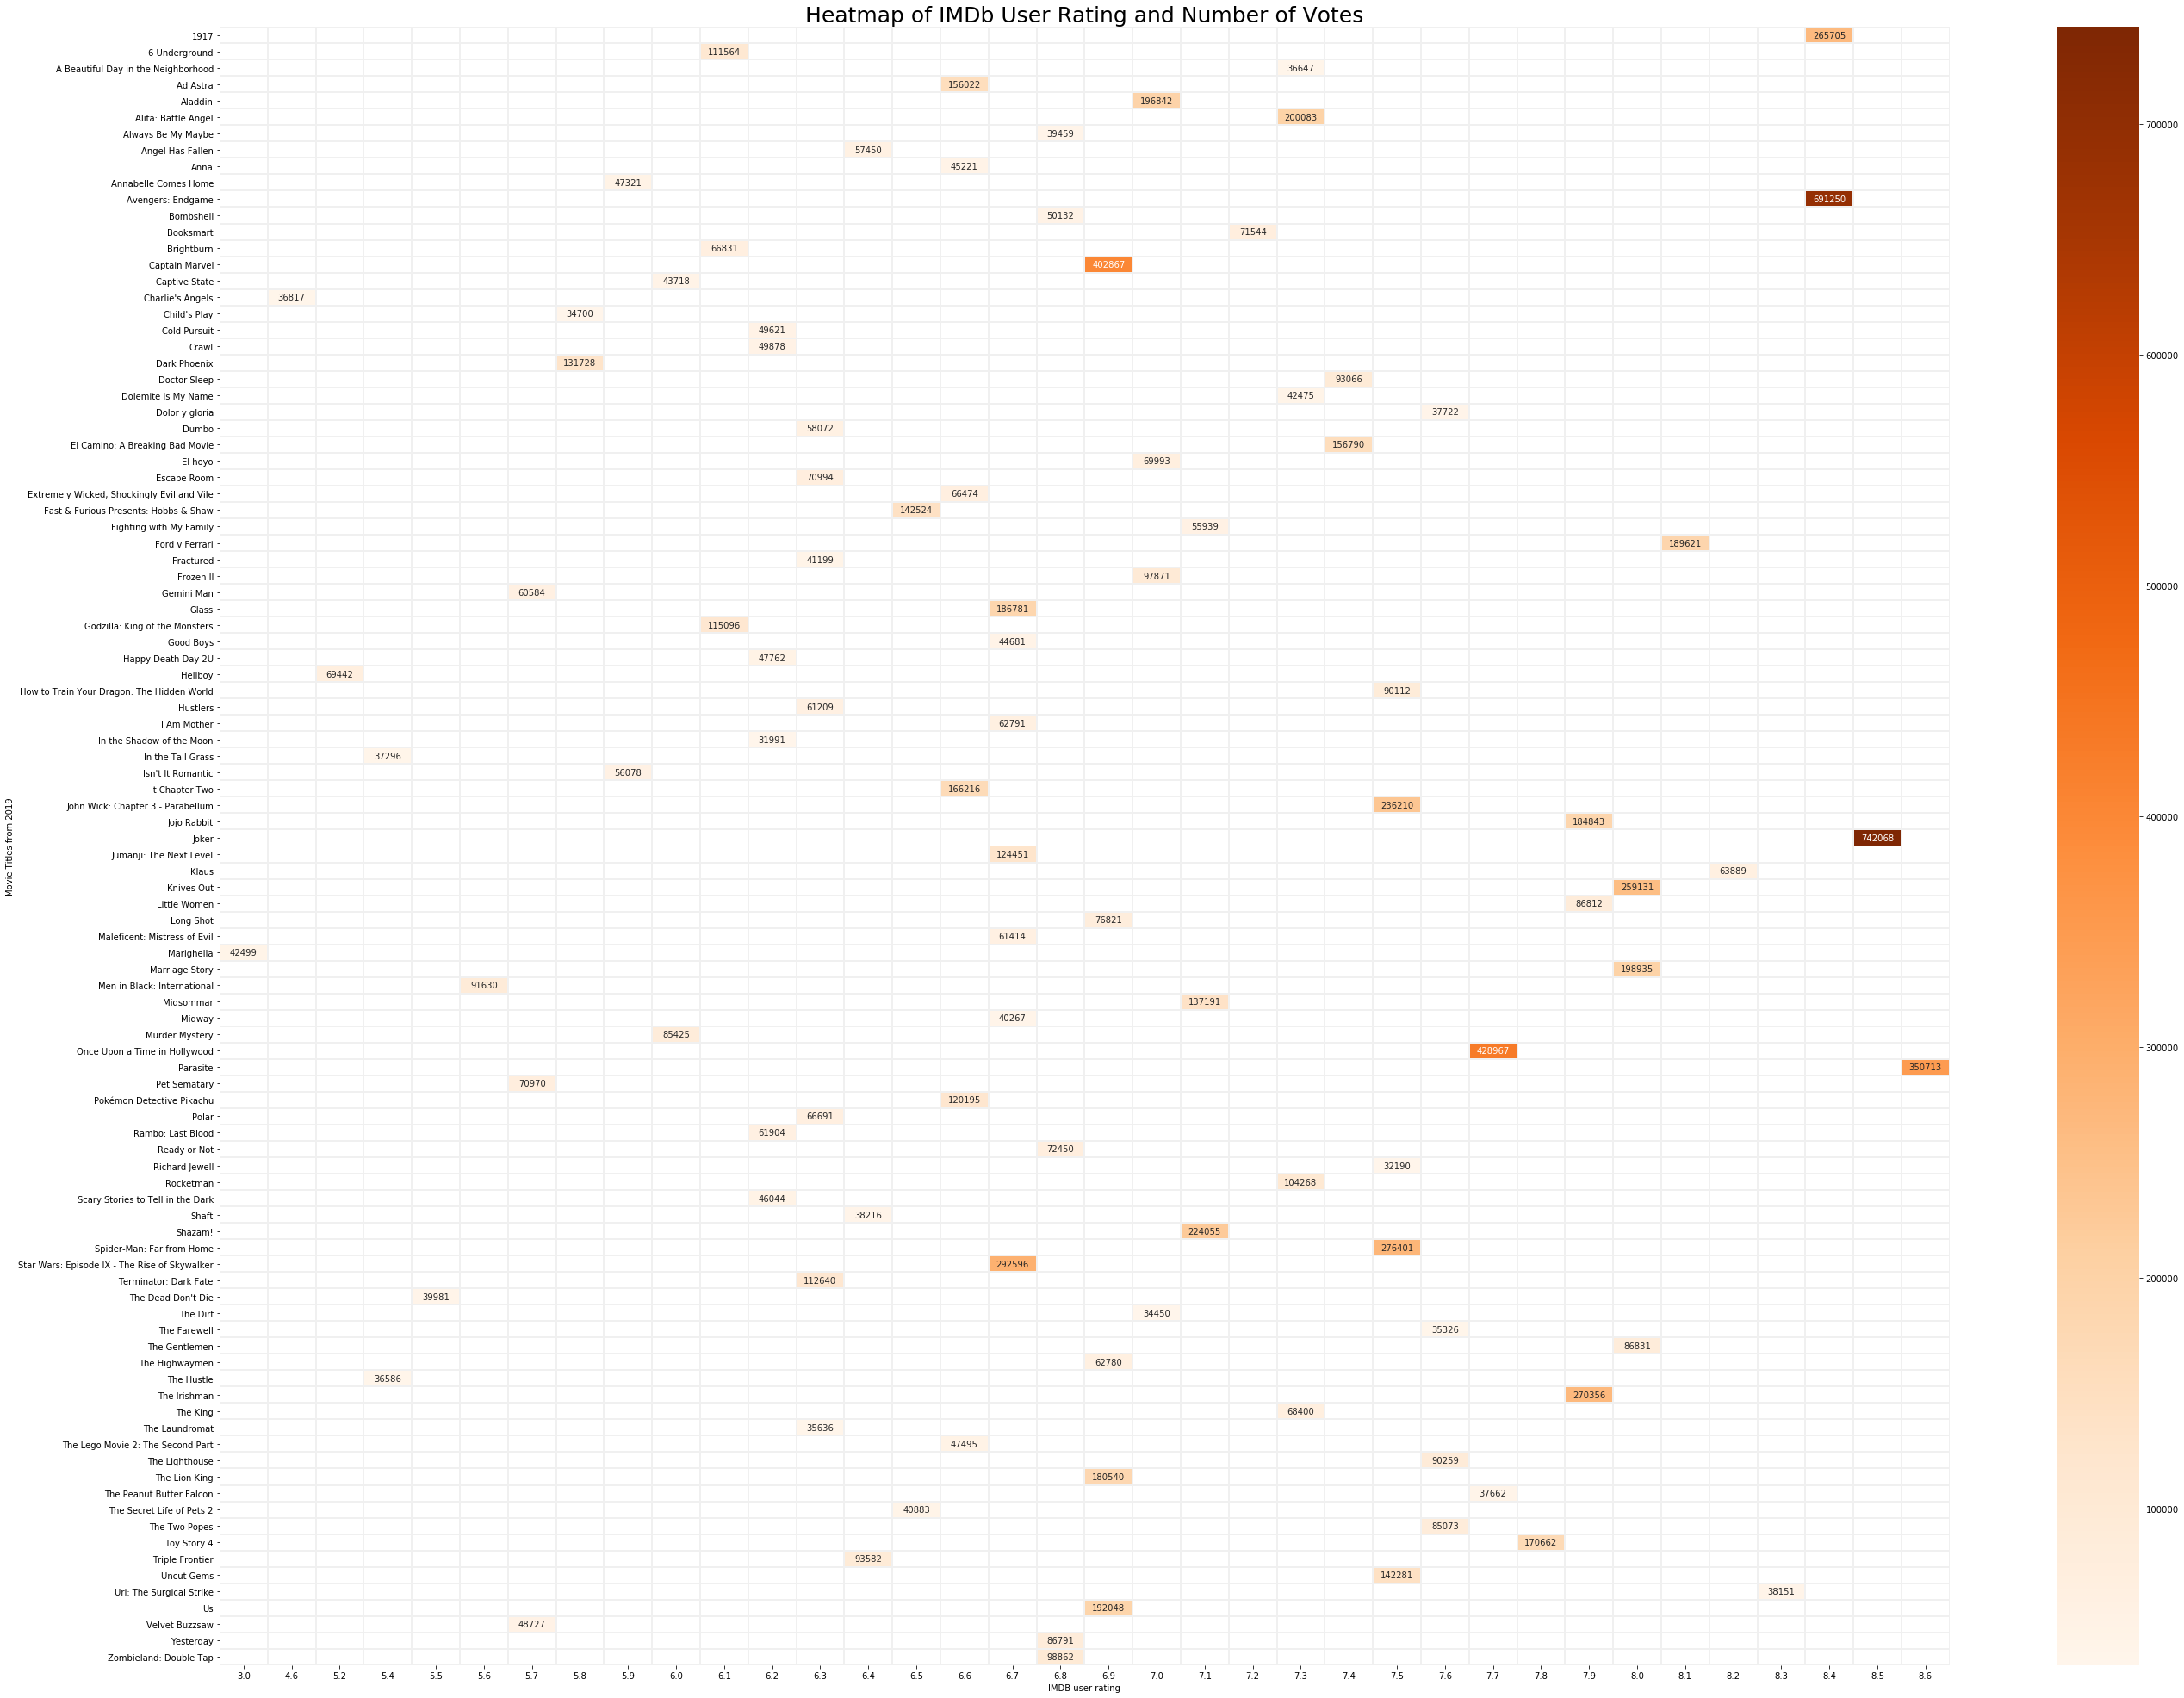

In [7]:
df_imdb = df.loc[df['Year'] > 2018]
df_imdb = df_imdb.pivot('Movie','IMDb_rating','IMDb_votes')

fig1, display_imdb = plt.subplots(figsize=(45,35))
fig1=sns.heatmap(df_imdb, fmt=".0f", annot=True, cmap='Oranges', linewidths=1, linecolor='#f0f0f0')
display_imdb.set_xlabel("IMDB user rating")
display_imdb.set_ylabel("Movie Titles from 2019")
display_imdb.set_title("Heatmap of IMDb User Rating and Number of Votes", size=25)

# DO DOUBLE CLICK INTO THE HEATMAP to see the details.

A very interesting detail from the above heatmap is that **Joker** had higher vote count than **Parasite**. This makes sense, as we all know that the whole world was hyped about Joker after its release and its audience-size is larger than Parasite. But **Parasite** clearly has been the winner with the users and hence the Best Picture winner for 2019.

From the heat map, we can also tell that a lot of the well-known titles are highly rated. Does that guarantee their nominations in the Academy Award? 
#### b. Barchart and boxplot from IMDB user rating over the years.

Oscar_nominee
0    6.709729
1    7.755782
Name: IMDb_rating, dtype: float64


Text(0, 0.5, 'IMDb User Rating')

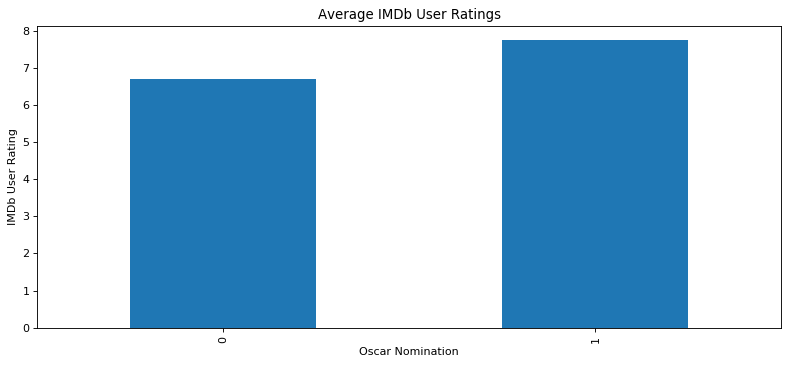

In [8]:
dfr=df.dropna(subset=['IMDb_rating'])
from matplotlib.pyplot import figure
oscar_group = dfr.groupby('Oscar_nominee')
print(oscar_group.mean()["IMDb_rating"])
figure(num=None, figsize=(12, 5), dpi=80, facecolor='w', edgecolor='k')
oscar_group.mean()["IMDb_rating"].plot(kind='bar', title='Average IMDb User Ratings')
plt.xlabel("Oscar Nomination")
plt.ylabel("IMDb User Rating")

In [9]:
fig = px.box(df, x="Year", y="IMDb_rating", color="Oscar_nominee")
fig.update_layout(title='IMDb Ratings of Movies from 1999 to 2019')
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

From both of the plots above, we can easily tell that nominees are highly rated titles! But is that always the case for all the years? Even for the winners? Let's look into the IMDb ratings of the winners.

### 2. Rotten Tomatoes Rating

#### a. Heat map for Rotten Tomatoes rating and number of reviews.
Similar to the heat map for IMDb rating, the heatmap has nominees and winners from the year 2019, slicing is done in order to give a easier output for the user to interpret

Text(0.5, 1, 'Heatmap of Rotten Tomatoes Critics Rating and Number of Reviews')

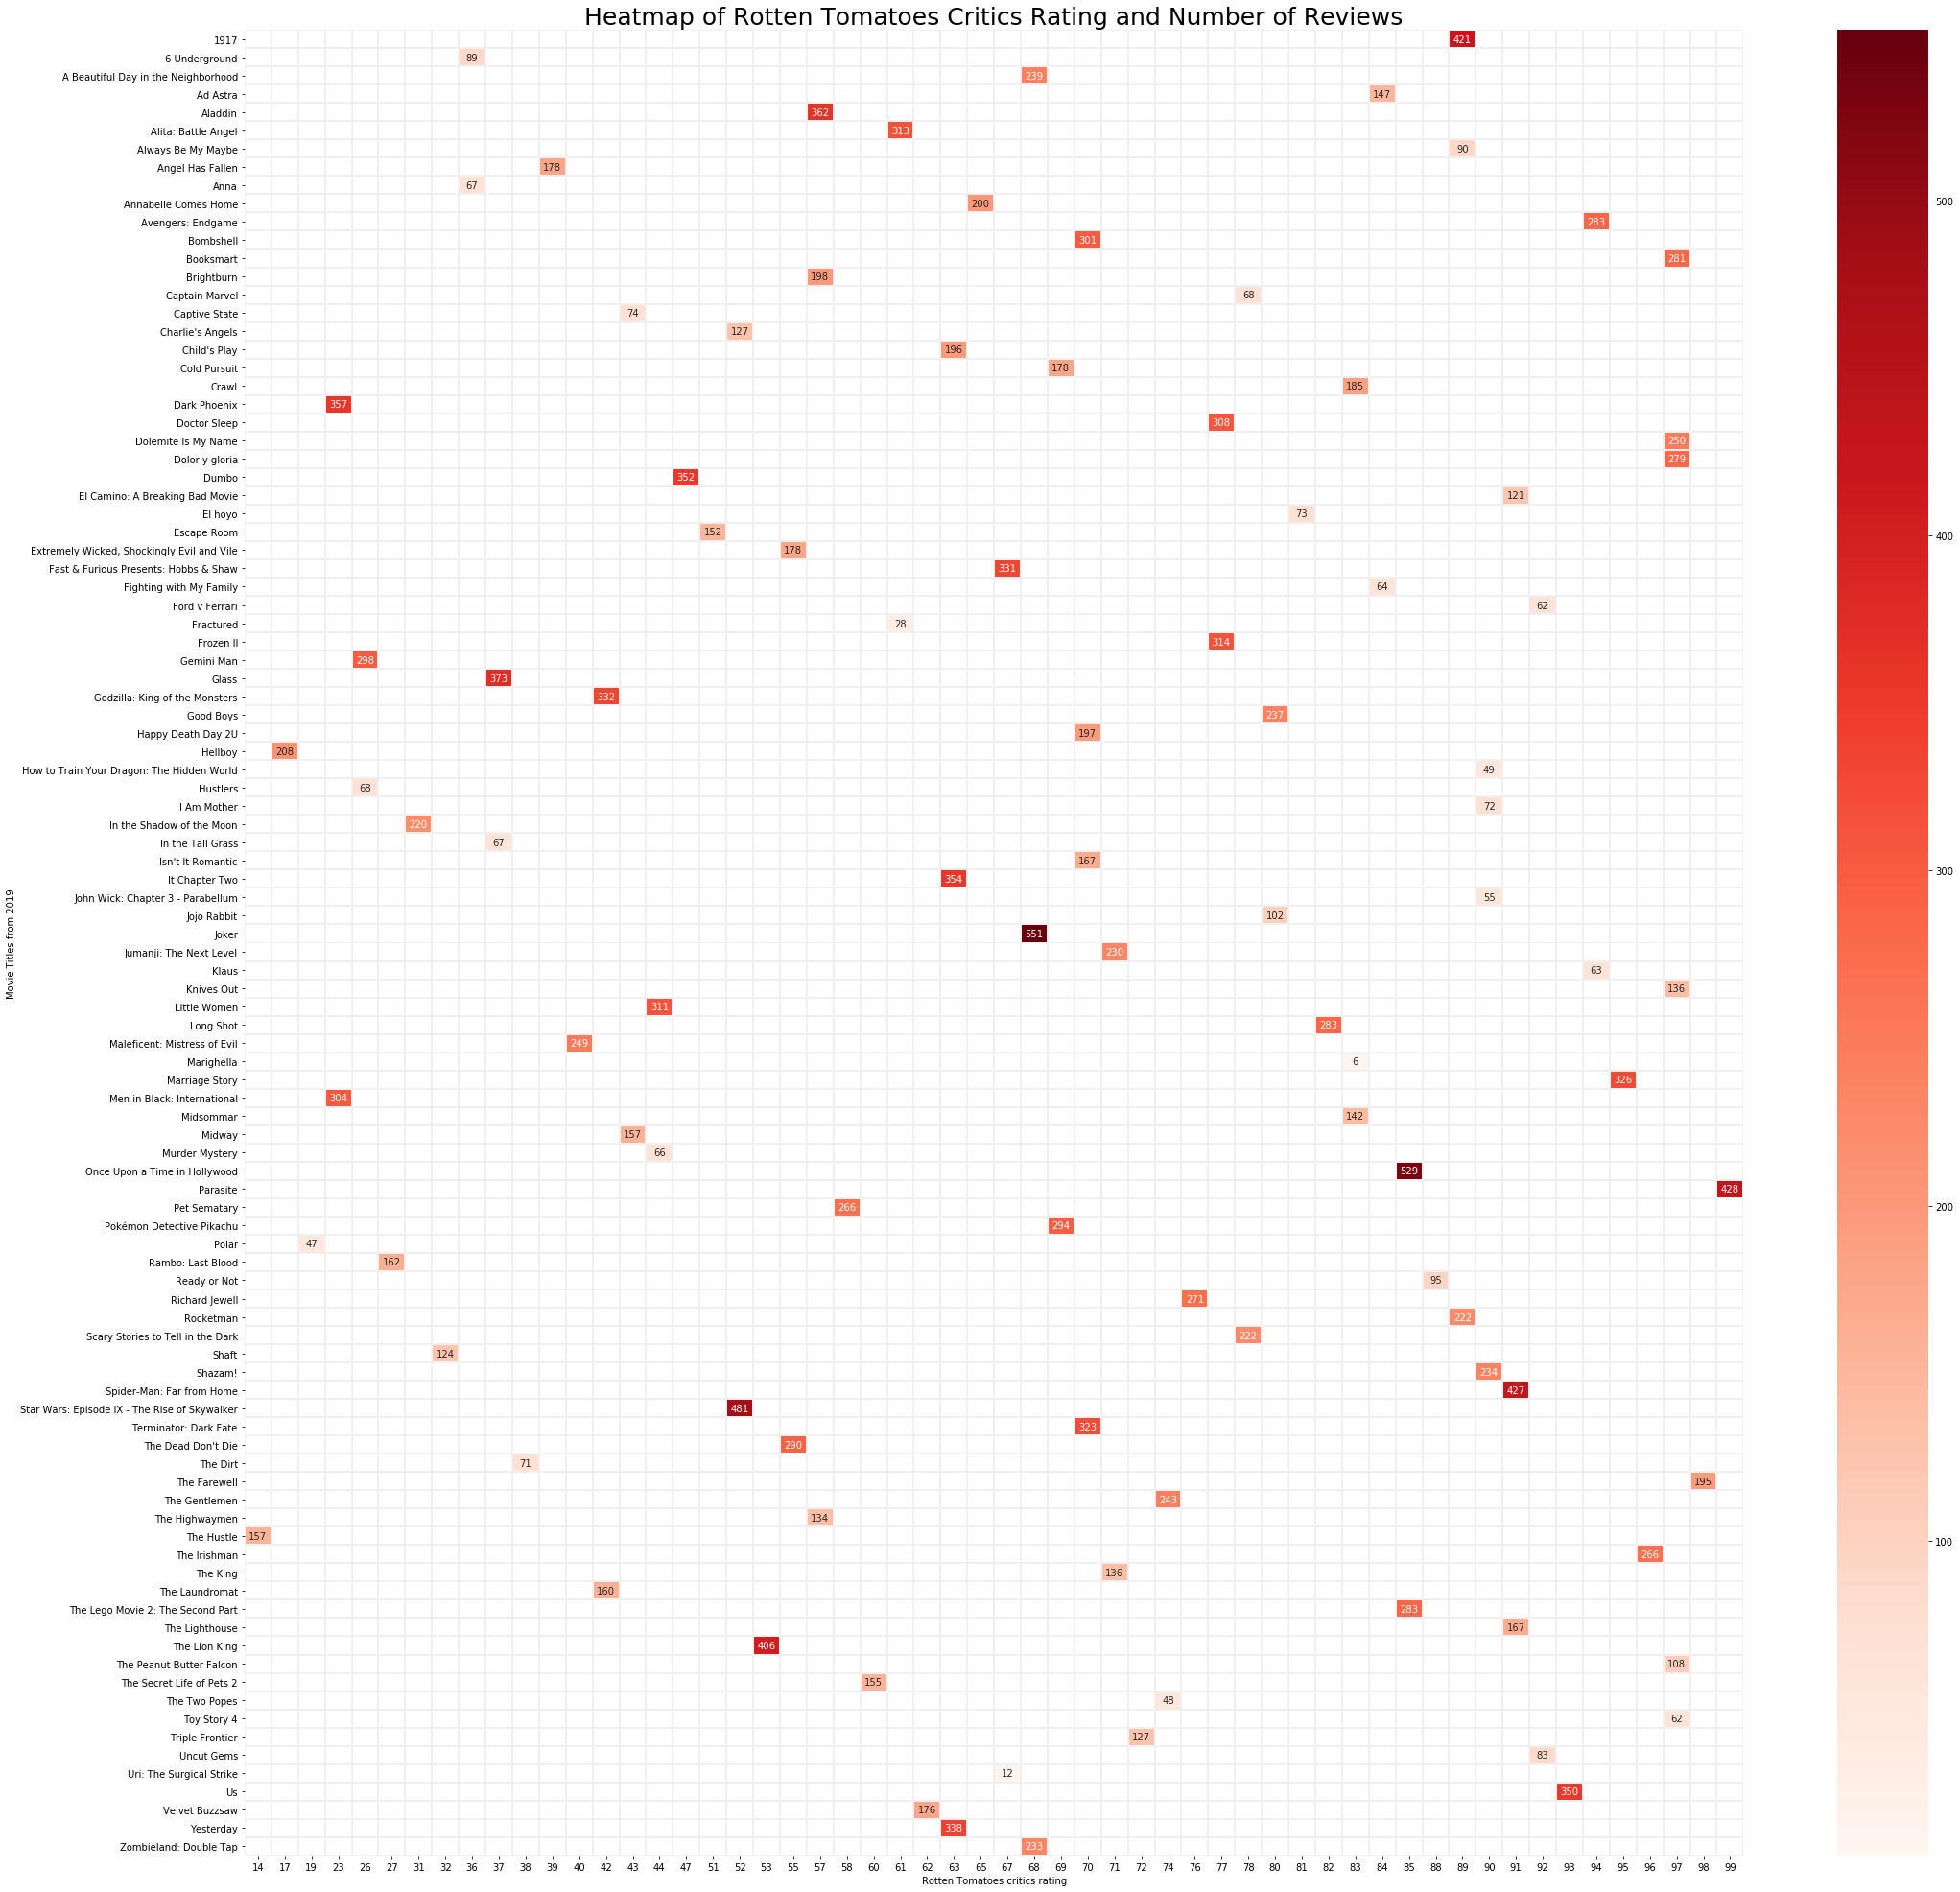

In [10]:
df_rotten_users = df.loc[df['Year'] > 2018]
df_rotten_users = df_rotten_users.pivot('Movie','RT_rating','RT_review')

fig2, display_rotten_users = plt.subplots(figsize=(35,35))
fig2=sns.heatmap(df_rotten_users, fmt=".0f", annot=True, cmap='Reds', linewidths=1, linecolor='#f0f0f0')
display_rotten_users.set_xlabel("Rotten Tomatoes critics rating")
display_rotten_users.set_ylabel("Movie Titles from 2019")
display_rotten_users.set_title("Heatmap of Rotten Tomatoes Critics Rating and Number of Reviews", size=25)
# DO DOUBLE CLICK INTO THE HEATMAP to see the details.

Similar to IMDb, **Parasite** has a better rating but overall lower number of votes. This is again expected, as **Joker** is more popular worldwide. Interestingly, **Joker** have a relatively lower rating compared to its IMDb rating. This could be down to the fact **Joker** is a rather  polarising title that causes its viewers to either strongly dislike it or wholeheartedly love it.

#### b. Barchart and boxplot from Rotten Tomatoes Rating over the years.

Oscar_nominee
0    58.693804
1    87.551020
Name: RT_rating, dtype: float64


Text(0, 0.5, 'Tomatometer Rating')

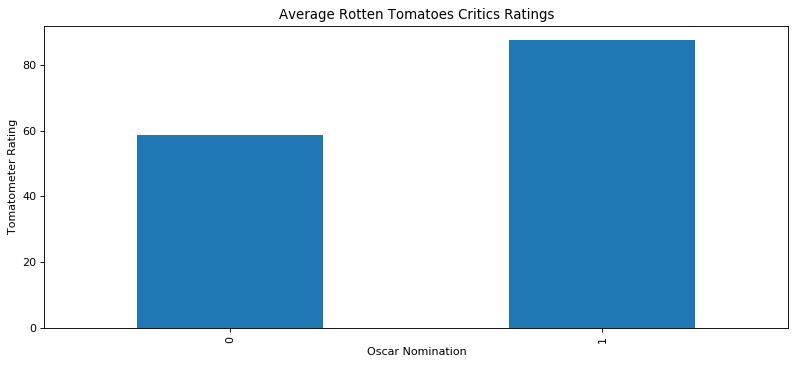

In [11]:
dfr=df.dropna(subset=['RT_rating'])
from matplotlib.pyplot import figure
oscar_group = dfr.groupby('Oscar_nominee')
print(oscar_group.mean()["RT_rating"])
figure(num=None, figsize=(12, 5), dpi=80, facecolor='w', edgecolor='k')
oscar_group.mean()["RT_rating"].plot(kind='bar', title="Average Rotten Tomatoes Critics Ratings")
plt.xlabel("Oscar Nomination")
plt.ylabel("Tomatometer Rating")

In [12]:
fig = px.box(df, x="Year", y="RT_rating", color="Oscar_nominee")
fig.update_layout(title='Rotten Tomatoes Critics Rating of Movies from 1999 to 2019')
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

---

Now, let us compare the ratings of both IMDb and Rotten Tomatoes on a 3D plot and see how do the nominated movies fare on the both of them.

#### 3D Plot to get an idea of IMDb Ratings and Rotten Ratings of all Best Picture nominated movies

In [13]:
# To extract the nominees from the dataframe 
df_nominee = df.loc[df['Oscar_nominee'] == 1].reset_index()
df_nominee.head()

index  Year                  Movie  Oscar_winner  Oscar_nominee  \
0      2  1999         The Green Mile             0              1   
1      3  1999        American Beauty             1              1   
2      4  1999        The Sixth Sense             0              1   
3     30  1999            The Insider             0              1   
4     46  1999  The Cider House Rules             0              1   

   Runtime (min) Certificate           Directors  \
0            189        R(A)      Frank Darabont   
1            122        R(A)          Sam Mendes   
2            107          PG  M. Night Shyamalan   
3            157          PG        Michael Mann   
4            126       NC-16     Lasse Hallström   

                                              Actors  Metascore  ...  \
0  ['Tom Hanks', 'Michael Clarke Duncan', 'David ...         61  ...   
1  ['Kevin Spacey', 'Annette Bening', 'Thora Birc...         84  ...   
2  ['Bruce Willis', 'Haley Joel Osment', 'Toni Co...         64  ...   
3  ['Russell Crowe', 'Al Pacino', 'Christopher Pl...         84  ...   
4  ['Tobey Maguire', 'Charlize Theron', 'Michael ...         75  ...   

   Golden_Bear_winner  Golden_Bear_nominee  Golden_Lion_winner  \
0                   0                    0                   0   
1                   0                    0                   0   
2                   0                    0                   0   
3                   0                    0                   0   
4                   0                    0                   0   

   Golden_Lion_nominee  PCA_winner  PCA_nominee  NYFCC_winner  NYFCC_nominee  \
0                    0           0            0             0              0   
1                    0           1            1             0              1   
2                    0           0            0             0              0   
3                    0           0            0             0              0   
4                    1           0            0             0              0   

  OFCS_winner  OFCS_nominee  
0           0             0  
1           1             1  
2           0             0  
3           0             1  
4           0             0  

[5 rows x 62 columns]

In [14]:
df_nominee.shape

(147, 62)

In [15]:
fig = px.scatter_3d(df_nominee, x='Movie', y='IMDb_rating', z='RT_rating',
                    color='Year')
fig.show()

It immediately becomes obvious here that most of the nominated films are rated highly on both platforms! There are a few outliers that were rated more poorly on Rotten Tomatoes but otherwise, the trend is consisitent throughout the years. 

Now that we've seen how nominated films are rated, let us narrow down to only the winners. We expect winners to highly rated overall by all parties, but is that truly the case? We'll answer that with a 3D plot using IMDb and Rotten Tomatoes ratings.

In [16]:
# Extract winners from the dataset
df_winners = df.loc[df['Oscar_winner'] == 1].reset_index()
df_winners.head()

index  Year                                          Movie  Oscar_winner  \
0      3  1999                                American Beauty             1   
1    100  2000                                      Gladiator             1   
2    201  2001                               A Beautiful Mind             1   
3    324  2002                                        Chicago             1   
4    400  2003  The Lord of the Rings: The Return of the King             1   

   Oscar_nominee  Runtime (min) Certificate      Directors  \
0              1            122        R(A)     Sam Mendes   
1              1            155          PG   Ridley Scott   
2              1            135          PG     Ron Howard   
3              1            113         M18   Rob Marshall   
4              1            201          PG  Peter Jackson   

                                              Actors  Metascore  ...  \
0  ['Kevin Spacey', 'Annette Bening', 'Thora Birc...         84  ...   
1  ['Russell Crowe', 'Joaquin Phoenix', 'Connie N...         67  ...   
2  ['Russell Crowe', 'Ed Harris', 'Jennifer Conne...         72  ...   
3  ['Renée Zellweger', 'Catherine Zeta-Jones', 'R...         82  ...   
4  ['Elijah Wood', 'Viggo Mortensen', 'Ian McKell...         94  ...   

   Golden_Bear_winner  Golden_Bear_nominee  Golden_Lion_winner  \
0                   0                    0                   0   
1                   0                    0                   0   
2                   0                    0                   0   
3                   0                    0                   0   
4                   0                    0                   0   

   Golden_Lion_nominee  PCA_winner  PCA_nominee  NYFCC_winner  NYFCC_nominee  \
0                    0           1            1             0              1   
1                    0           0            0             0              0   
2                    0           0            0             0              0   
3                    0           0            0             0              0   
4                    0           0            0             1              1   

  OFCS_winner  OFCS_nominee  
0           1             1  
1           0             0  
2           0             0  
3           0             0  
4           1             1  

[5 rows x 62 columns]

In [17]:
df_winners.shape

(21, 62)

In [18]:
fig = px.scatter_3d(df_winners, x='Movie', y='IMDb_rating', z='RT_rating',
                    color='Year')
fig.show()

By comparing ratings from the two sources, we can see that most winners are highly rated on both platforms save for a few outliers such as Crash and Green Book (which were both not expected to win the award) that score lower on both websties. It seems that ratings are generally consistent regardless of the source. One thing to point out is that the winner of Best Picture Award 2020, **Parasite** has relatively high ratings from both sources compared to other winners dated up to 1999.

But are two source of ratings enough to justify a movie's reception? To further compare the ratings between nominees and unnominated films, we decide to take **Metascore** of each category and look into their averaged Metascore. We should also point out that the Metascore of a movie is its averaged rating based on a huge number of critic reviews. 

---

### 3. Metascore 

Oscar_nominee
0    55.444956
1    81.564626
Name: Metascore, dtype: float64


Text(0, 0.5, 'Metascore')

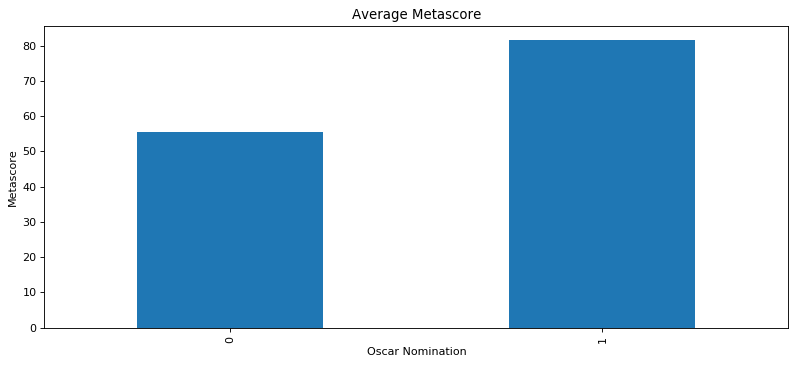

In [19]:
dfr=df.dropna(subset=['Metascore'])
from matplotlib.pyplot import figure
oscar_group = dfr.groupby('Oscar_nominee')
print(oscar_group.mean()["Metascore"])
figure(num=None, figsize=(12, 5), dpi=80, facecolor='w', edgecolor='k')
oscar_group.mean()["Metascore"].plot(kind='bar', title="Average Metascore")
plt.xlabel("Oscar Nomination")
plt.ylabel("Metascore")

In [20]:
fig = px.box(df, x="Year", y="Metascore", color="Oscar_nominee")
fig.update_layout(title='Metascore of Movies from 1999 to 2019')
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

The trend of nominees getting better reviews and ratings continue as we explore Metascore. However, this much is expected as winning titles are usually, if not always well-acclaimed titles that are praised and loved. 

But before we draw an ultimate line and conclude that reviews and ratings define Oscar Awards, let us inspect how money may shift the tide on how movies may be decided to lift the awards. The question at this point is, "Between **critical success and commercial success**, which of the two has **greater impact** on a movie's chances of winning the Academy Award for Best Picture?".

--- 

### 4. Box Office (It's all about money!)
Let us now address the elephant in the room: **Money**. Since nominated movies tend to have higher ratings, does that implys that they will also perform better in the theaters? For this section, we will be breaking down the box office to three parts: Domestic box office (US), International box office and Worldwide box office with them related in a way such that:

Domestic box office + International box office = Worldwide box office

Note: All values are shown in United States Dollars (USD)

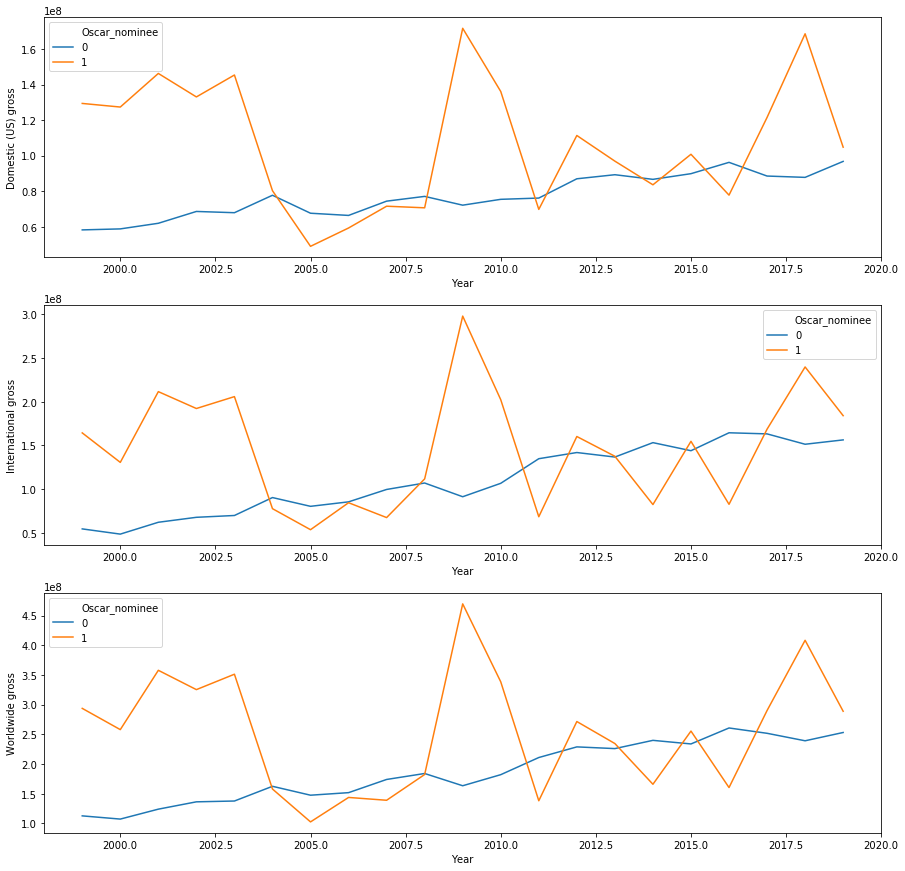

In [21]:
f, axes = plt.subplots(3, 1, figsize =(15,15))

# ### domestic
c = df.groupby(['Year', 'Oscar_nominee'])[['Domestic (US) gross']].mean().reset_index()
sns.lineplot('Year', 'Domestic (US) gross', data=c, hue = 'Oscar_nominee',  ax=axes[0])

# ### international
c = df.groupby(['Year', 'Oscar_nominee'])[['International gross']].mean().reset_index()
sns.lineplot('Year', 'International gross', data=c, hue = 'Oscar_nominee',  ax=axes[1])

### world wide
c = df.groupby(['Year', 'Oscar_nominee'])[['Worldwide gross']].mean().reset_index()
sns.lineplot('Year', 'Worldwide gross', data=c, hue = 'Oscar_nominee', ax=axes[2])

The line plots above shows a consistent trend over the three earnings and for most of the years, Oscar nominees earn much more than their unnominated counterparts. For years that unnominated movies do earn more than nominated movies, the win is by a smaller margin. Do note that for each year, the ratio of the number of nominees to unnominated movies in our data is 6:94 or 8:92 due to the handful number of nominees each year. This fact makes the numbers much more impressive as a mere 8 or 6 movies are able to earn way more than the others. 

---

### 5. Budget

We saw that Academy Award winners tend to earn more than others, but how about the money that were poured into their production in the first place? Do more budget brings higher earnings? 

Oscar_nominee
0    5.757913e+07
1    4.658980e+07
Name: Budget, dtype: float64


Text(0, 0.5, 'Box Office')

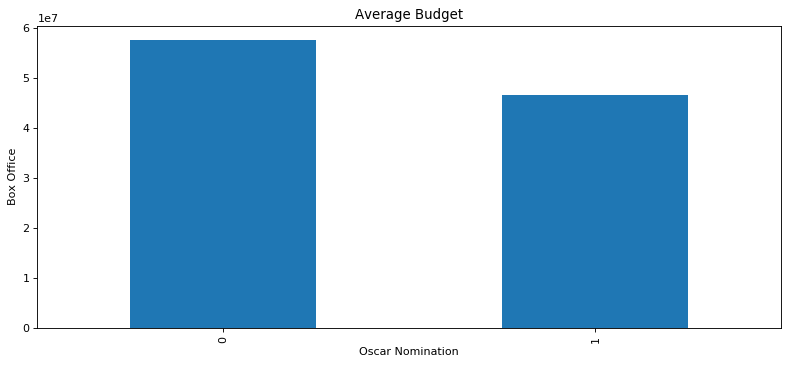

In [22]:
dfr=df.dropna(subset=['Budget'])
from matplotlib.pyplot import figure
oscar_group = dfr.groupby('Oscar_nominee')
print(oscar_group.mean()["Budget"])
figure(num=None, figsize=(12, 5), dpi=80, facecolor='w', edgecolor='k')
oscar_group.mean()["Budget"].plot(kind='bar', title="Average Budget")
plt.xlabel("Oscar Nomination")
plt.ylabel("Box Office")

What a surprising fact. The unnominated movies are averaging a budget more than Oscars nominees despite the Oscars nominees earning more. This may very well debunk the myth that big budget blockbusters are guaranteed winners! It appears that money is not all that makes the filming industry turn!

In [23]:
fig = px.box(df, x="Year", y="Budget", color="Oscar_nominee")
fig.update_layout(title='Budget of Movies from 1999 to 2019')
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

This boxplot further confirms that unnominated movies on an average, spend more on the film's budget, regardless on marketing or production. 

---

### 6. Runtime 

We would rarely associate a movie's length to its chances of winning an Academy Award. But are they related? Let's find out in this section.

Oscar_nominee
0    112.059396
1    129.142857
Name: Runtime (min), dtype: float64


Text(0, 0.5, 'Runtime (min)')

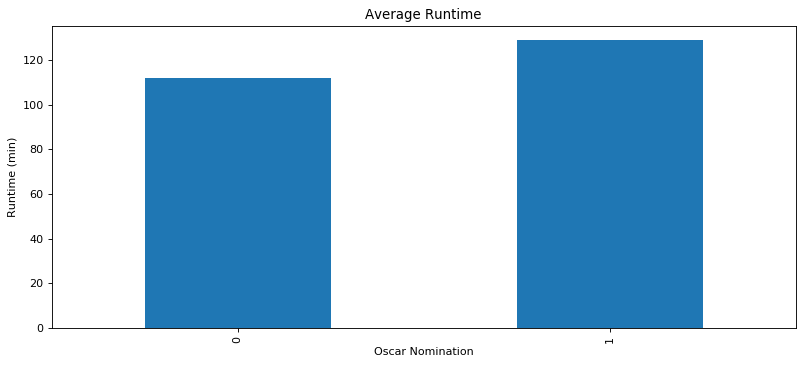

In [24]:
dfr=df.dropna(subset=['Runtime (min)'])
from matplotlib.pyplot import figure
oscar_group = dfr.groupby('Oscar_nominee')
print(oscar_group.mean()["Runtime (min)"])
figure(num=None, figsize=(12, 5), dpi=80, facecolor='w', edgecolor='k')
oscar_group.mean()["Runtime (min)"].plot(kind='bar', title="Average Runtime")
plt.xlabel("Oscar Nomination")
plt.ylabel("Runtime (min)")

The difference is a mere 10 minutes in average. Perhaps there isn't much relation? But from here we can tell that the nominees do run for a longer time in the theater than the unnominated ones.

In [25]:
import plotly.express as px

fig = px.box(df, x="Year", y="Runtime (min)", color="Oscar_nominee")
fig.update_layout(title='Runtime (min) of Movies from 1999 to 2019')
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

One noticeable feature from the boxplot above is that the runtime for oscars nominees are varying each year. On comparison, the unnominated moveis have a rather consistent pattern throughout the years. Nevertheless, it is safe for us to say that the nomination in Oscars is fairly irrelevant with the movie's runtime.

---

### 7. Winning Titles According to Genre
Do the audience prefer a specific genre when it comes to winning the Oscars? Let's find it out. 

#### a. Countplot for Win and Lost in Oscars for each genre.

In [26]:
# Extracting genres
df_genre = df.iloc[:,18:37]
df_genre = pd.concat([df_genre, df['Oscar_winner']], axis=1, join='inner')
genre_list = list(df_genre.columns)
genre_list

['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western',
 'Oscar_winner']

In [27]:
genres = ['Action', 'Adventure', 'Animation', 'Biography',
          'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History',
          'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
          'Sport', 'Thriller', 'War', 'Western']

Text(0.5, 1.0, 'Genres with Oscar Win & Lost')

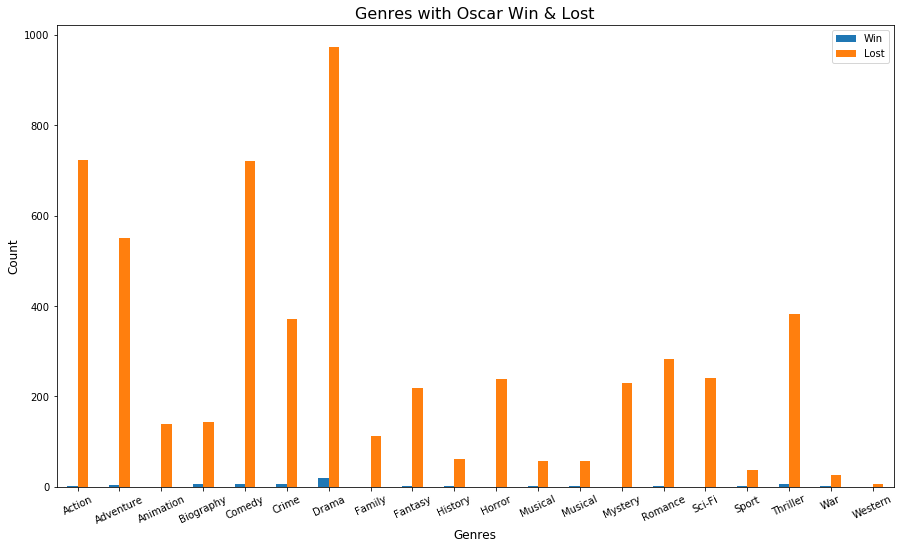

In [28]:
zero = np.zeros(shape=(20,2))
df_count = pd.DataFrame(zero, columns=['Win', 'Lost'], index = genres)

for genre in genres:
    temp = df_genre[df_genre[genre] == 1]
    total = temp.shape[0]
    x = temp.groupby('Oscar_winner')['Oscar_winner'].count()
    df_count.loc[genre, 'Lost'] = x[0] if x[0] else 0
    df_count.loc[genre, 'Win'] = (total - x[0])

df_t = df_count.T

ax = pd.concat([df_t.loc['Win'], df_t.loc['Lost']],axis=1).plot(kind = 'bar', figsize=(15,8.5))

ax.set_xticklabels(genres, rotation = 25)
ax.set_xlabel("Genres", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
ax.set_title("Genres with Oscar Win & Lost", fontsize=16)

Often than not, stats show that movies belonging to the 'drama' genre win Oscars. But when we look at the above diagram, where we try to match all genres with the movies we tend to see the number of movies that fall under 'Drama' are high, maybe that's why stats ends up showing drama genre as a forerunner. The numbers can be hard to tell on the bar chart above due to huge difference in scale. Let's zoom in on the numbers of only the winners and their genre.

In [29]:
df.Genre = df.Genre.astype(str)
binarizer = MultiLabelBinarizer()
genres = pd.DataFrame(
    binarizer.fit_transform(df_winners["Genre"].str.split(",")),
    columns=binarizer.classes_
)
genres = genres.drop([""], axis=1)

In [31]:
arranged_genre = genres.sum().sort_values(ascending=False)
print(arranged_genre)

Drama        20
Thriller      6
Biography     6
Crime         5
Comedy        5
Adventure     3
Romance       2
History       2
Fantasy       2
War           1
Sport         1
Musical       1
Action        1
dtype: int64


Text(0, 0.5, '')

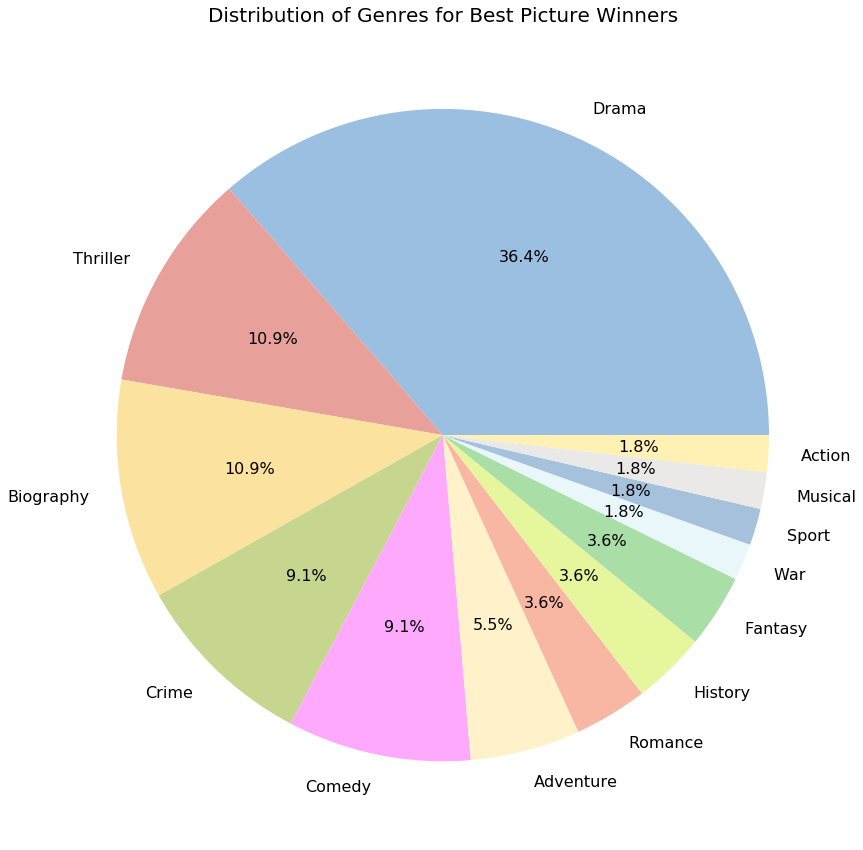

In [32]:
rcParams['font.size'] = 16
colors = ['#9BBFE0','#E8A09A','#FBE29F','#C6D68F','#FFA9FD','#FFF1C9','#F7B7A3',
         '#E6F69D','#AADEA7','#E9F6FA','#A5C1DC','#EAE9E7','#FFF0B4']
arranged_genre.plot.pie(figsize=(15,15), colors=colors, autopct='%.1f%%')
plt.title("Distribution of Genres for Best Picture Winners", size=20)
plt.ylabel("")

Based on this pie chart, it becomes far more obvious that "Drama" titles are much more favoured by the AMPAS' board of committee with it being a big slice in the pie chart. We can easily tell that 'Drama' titles win more oscars than any other genres, with 'Biography' and 'Thriller' far in behind in runner-up.

#### b. IMDb Ratings for Each Genre.

In [33]:
df_genre_imdb = df[df.Movie != 'O']
DF_genre_imdb = pd.DataFrame()

for g in genres:
    temp = df_genre_imdb[df_genre_imdb[g]==1][['IMDb_rating']]
    temp['Genre'] = g
    DF_genre_imdb = DF_genre_imdb.append(temp)

DF_genre_imdb.info()
set(DF_genre_imdb.Genre.values)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4603 entries, 1 to 2087
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   IMDb_rating  4603 non-null   float64
 1   Genre        4603 non-null   object 
dtypes: float64(1), object(1)
memory usage: 107.9+ KB


{'Action',
 'Adventure',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Fantasy',
 'History',
 'Musical',
 'Romance',
 'Sport',
 'Thriller',
 'War'}

In [34]:
fig = px.box(DF_genre_imdb, x="Genre", y="IMDb_rating")
fig.update_layout(title='IMDb Ratings of Movies from 1999 to 2019', width=950, height=600)
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

The IMDb ratings for every genre appears relatively balanced, with some outliers each but the interquartile range largely remains in the range from 6 to 8.

#### c. Rotten Tomatoes Critics Rating for Each Genre.

In [35]:
df_genre_rt = df[df.Movie != 'O']
DF_genre_rt = pd.DataFrame()

for g in genres:
    temp = df_genre_rt[df_genre_rt[g]==1][['RT_rating']]
    temp['Genre'] = g
    DF_genre_rt = DF_genre_rt.append(temp)

DF_genre_rt.info()
set(DF_genre_rt.Genre.values)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4603 entries, 1 to 2087
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   RT_rating  4603 non-null   int64 
 1   Genre      4603 non-null   object
dtypes: int64(1), object(1)
memory usage: 107.9+ KB


{'Action',
 'Adventure',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Fantasy',
 'History',
 'Musical',
 'Romance',
 'Sport',
 'Thriller',
 'War'}

In [36]:
# Boxplot 2, able to display info via hovering text box

fig = px.box(DF_genre_rt, x="Genre", y="RT_rating")
fig.update_layout(title='Rotten Tomatoes Crtitics Ratings of Movies from 1999 to 2019', width=950, height=600)
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

In the graph above, the differences in ratings between genres are much more apparent. 'Biography' and 'Western' are slightly better rated than the rest but one thing to point out is that for most of the genres (save for 'Biography'), the range is fairly large, ranging all the way from the bottom to the top of the chart. Does this imply that Rotten Tomatoes tend to give out rather extreme values on both ends? 

---

## Analyzing Academy Award for Best Picture Winners

In this part, let's narrow it down and **put the winners under the microscope**. We saw how nominees are different from the others based on the features in the parts earlier. Let's fitler only the Oscar winners from our dataset.

In [37]:
df_winners = df.loc[df['Oscar_winner'] == 1].reset_index()
df_winners.head(3)

index  Year             Movie  Oscar_winner  Oscar_nominee  Runtime (min)  \
0      3  1999   American Beauty             1              1            122   
1    100  2000         Gladiator             1              1            155   
2    201  2001  A Beautiful Mind             1              1            135   

  Certificate     Directors  \
0        R(A)    Sam Mendes   
1          PG  Ridley Scott   
2          PG    Ron Howard   

                                              Actors  Metascore  ...  \
0  ['Kevin Spacey', 'Annette Bening', 'Thora Birc...         84  ...   
1  ['Russell Crowe', 'Joaquin Phoenix', 'Connie N...         67  ...   
2  ['Russell Crowe', 'Ed Harris', 'Jennifer Conne...         72  ...   

   Golden_Bear_winner  Golden_Bear_nominee  Golden_Lion_winner  \
0                   0                    0                   0   
1                   0                    0                   0   
2                   0                    0                   0   

   Golden_Lion_nominee  PCA_winner  PCA_nominee  NYFCC_winner  NYFCC_nominee  \
0                    0           1            1             0              1   
1                    0           0            0             0              0   
2                    0           0            0             0              0   

  OFCS_winner  OFCS_nominee  
0           1             1  
1           0             0  
2           0             0  

[3 rows x 62 columns]

Let's look at the following features of the winners -

- IMDB user rating
- Rotten Tomatoes critic rating
- Runtime
- Worldwide box office
- Budget

#### a. Barchart from IMDB user rating

In [38]:
fig = px.bar(df_winners, x='Movie', y='IMDb_rating',color='Year', 
             title='IMBD user rating for each Best Picture winner', height=600)
fig.show()

As expected, the ratings are soaring for all the Oscar Winners.
#### b. Barchart from Rotten Tomatoes user rating

In [39]:
fig = px.bar(df_winners, x='Movie', y='RT_rating',color='Year', 
             title='Rotten Tomatoes rating for each Best Picture winner', height=600)
fig.show()

There are a few movies with relatively low ratings, which is strange compared to the normal high numbers.

#### c. Barchart to see the runtime of all Best Picture winners

In [40]:
fig = px.bar(df_winners, x='Movie', y='Runtime (min)',color='Year', 
             title='Runtime for each Best Picture winner', height=600)
fig.show()

The runtime for the Best Picture winners seems to be pretty consistent, with most hitting the 2 hours mark. There are a few exceptions such as "The Lord of the Rings: The Return of the King" which lenght is well known since the first installment, "The Lord of the Rings: The Fellowship of the Ring" in the The Lord of the Rings trilogy.

#### d. Barchart to see the Worldwide Box Office of all Best Picture winners

In [41]:
fig = px.bar(df_winners, x='Movie', y='Worldwide gross',color='Year', 
             title='Worldwide Box Office for each Best Picture winner', height=600)
fig.show()

#figures shown are not adjusted for inflation!

This chart confirmed our observation from the comparision between nnominees and unnominated movies in the section earlier. The Best Picture winners are apparently not the biggest earners from the box office. The fact that big blockbusters such as "Avengers: Endgame" which has grossed over $2.8B worldwide has missed out on even a nomination for the award further proves that money is not everything to winning awards in cinematic arts.

### e. Barchart to see the Budget of all Best Picture winners

In [42]:
fig = px.bar(df_winners, x='Movie', y='Budget',color='Year', 
             title='Budget for each Best Picture winner', height=600)
fig.show()

#Figure not adjusted for inflation!

Similar to the point made above in box office, Oscars winners need not to be big money earning titles nor big production blockbusters. Many titles in fact, has a budget only a mere splinter of blockbusters'. To reason, it may come down to theme of these winning titles and how well did they handle them. For instance, "Moonlight" and "Parasite" both highlight social issues in their settings and story. 

---

## Correlation  Academy Award and Other Annual Film Awards 

Oscars winning titles are usually praised and loved by critics and general viewers regardless of region and age. This lead to the movies winning lifting multiple awards in the span of a year including international and regional awards such as:
1. The British Academy of Film and Television Arts Award (BAFTA Award)
2. The Directors Guild of America Awards (DGA Award)
3. The Golden Globe Awards 
4. The Producers Guild of America Awards (PGA Award)
5. The Critics' Choice Movie Awards
6. The Palme d'Or (Cannes Film Festival)
7. The Golden Bear (Berlin International Film Festival)
8. The Golden Lion (Venice Film Festival)
9. E! People's Choice Awards
10. The New York Film Critics Circle Award
11. The Online Film Critics Society Award

With this in mind, we will continue to explore the correlation between these awards and the most prestigious of them all, **The Academy Awards**.

Firstly, we will compare the winners for **Oscars' Best Picture Award** with **BAFTA award** on a 3D plot.

In [43]:
import plotly.express as px
fig = px.scatter_3d(df_winners, x='Movie', y='BAFTA_winner', z='BAFTA_nominee',
                    color='Year')
fig.show()

Apparently, the board behind BAFTA and Oscars do see eye to eye for most of the time as many titles are commonly nominated in the two awards, if not the winner of the awards. There are however, certain exceptions where the Best Picture Award winner at the Academy Awards is not even nominated in BAFTA.

Next, let us examine **Director Guild's Award**.

In [44]:
import plotly.express as px
fig = px.scatter_3d(df_winners, x='Movie', y='DGA_winner', z='DGA_nominee',
                    color='Year')
fig.show()

The correlation between **Director Guild's Award** is even better than **BAFTA**! All Best Picture winners from 1999 to 2019 and nominated in both awards!

Let's see how do the the two awards; **BAFTA** and **DGA** compare when it comes to predicting the winner.

In [45]:
import plotly.express as px
fig = px.scatter_3d(df_winners, x='Movie', y='DGA_winner', z='BAFTA_winner',
                    color='Year')
fig.show()

What a surprise. While each of the award fairly agrees with the winners of the **Academy Awards**, it seems that the two awards don't always agree with each other, with only a handful of movies to win all three awards.

With that said, our own speculation may be proven wrong when faced with staitistical data. To put all the awards listed before into consideration, we will use a heatmap to identify exactly which award has the highest ccorrelation with the Oscars.

In [46]:
df_awards = pd.concat([df['Oscar_winner'],df['BAFTA_winner'], df['DGA_winner'], df['GG_comedy_winner'], df['GG_drama_winner'],
                       df['PGA_winner'], df['CCMA_winner'], df["Golden_Palm_winner"], df['Golden_Bear_winner'],
                       df['Golden_Lion_winner'], df['PCA_winner'], df['NYFCC_winner'], df['OFCS_winner']], axis=1, join='inner')
awards_list = list(df_awards.columns)
print(awards_list)

['Oscar_winner', 'BAFTA_winner', 'DGA_winner', 'GG_comedy_winner', 'GG_drama_winner', 'PGA_winner', 'CCMA_winner', 'Golden_Palm_winner', 'Golden_Bear_winner', 'Golden_Lion_winner', 'PCA_winner', 'NYFCC_winner', 'OFCS_winner']


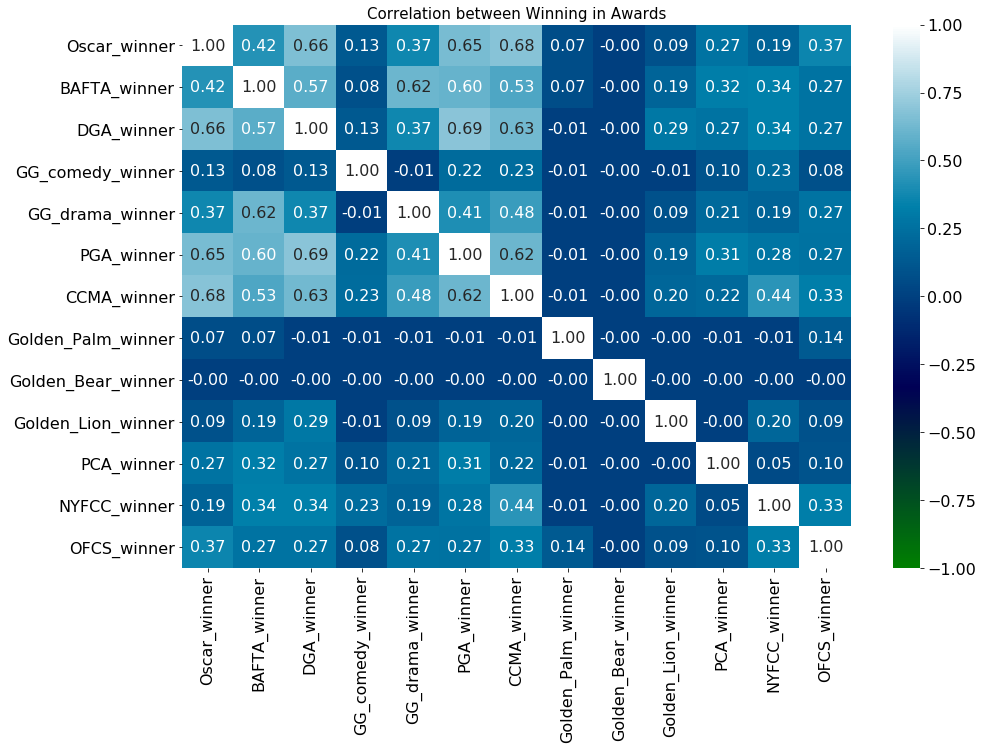

In [47]:
f, axes = plt.subplots(1, 1, figsize=(15, 10))
ax = plt.axes()
ax.set_title('Correlation between Winning in Awards', size=15)
sns.heatmap(df_awards.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f", cmap = "ocean")

By the figures, it appears that DGA, PGA and CCMA has relatively higher correlation to Oscars.

With the correlation between winning the awards in mind, how about the nomination in those respective awards? Are there mutual nominees in awards that have high correlation of winning? Let's find out.

In [48]:
df_nominee = pd.concat([df['Oscar_nominee'],df['BAFTA_nominee'], df['DGA_nominee'], df['GG_comedy_nominee'], df['GG_drama_nominee'],
                       df['PGA_nominee'], df['CCMA_nominee'], df["Golden_Palm_nominee"], df['Golden_Bear_nominee'],
                       df['Golden_Lion_nominee'], df['PCA_nominee'], df['NYFCC_nominee'], df['OFCS_nominee']], axis=1, join='inner')
nominee_list = list(df_nominee.columns)
print(nominee_list)

['Oscar_nominee', 'BAFTA_nominee', 'DGA_nominee', 'GG_comedy_nominee', 'GG_drama_nominee', 'PGA_nominee', 'CCMA_nominee', 'Golden_Palm_nominee', 'Golden_Bear_nominee', 'Golden_Lion_nominee', 'PCA_nominee', 'NYFCC_nominee', 'OFCS_nominee']


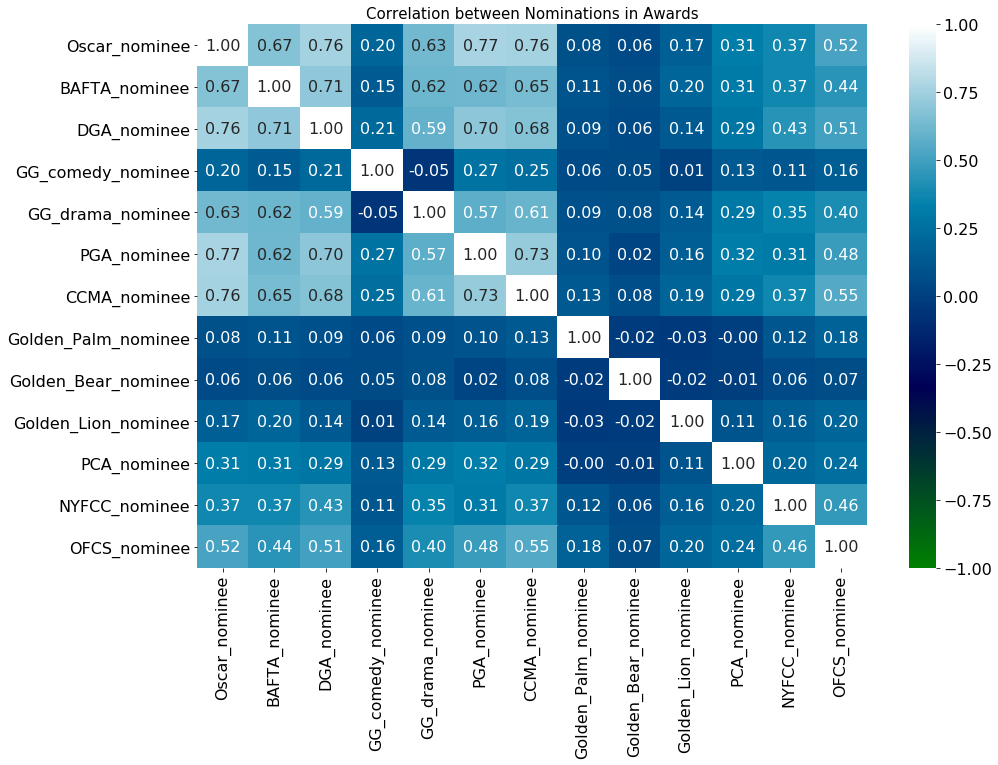

In [49]:
f, axes = plt.subplots(1, 1, figsize=(15, 10))
ax = plt.axes()
ax.set_title('Correlation between Nominations in Awards', size=15)
sns.heatmap(df_nominee.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f", cmap = "ocean", ax=ax)

With regards to nomination, DGA, PGA and CCMA again have the highest correlation. This time however, BAFTA and GG (drama) too have rather higher correlation to Oscars nomination.

---

# Conclusion

Through exploratory analysis we were able to establish the behavior of the features and draw relationships between the features. The plots and visuals helped in rooting the anomalies expected and helped in better understanding of the dataset. To sum up, we discover that the following features are more relevant than the others when identifying the few winners from a big stack of movies.

- IMDb User Rating
- Rotten Tomatoes Crtitics Rating
- Metascore
- The Director Guild of America Award (Win & Nomination)
- The Producer Guild of America Award (Win & Nomination)
- Critics' Choice Movie Awards (Win & Nomination)
- British Art and Film Association (BAFTA) Award nomination
- Golden Globes Award - Drama nomination
- The Academy Award for Best Picture nomination

We decided to narrow it down these features to be included in our prediciton models. By **regularisation**, we hope to avoid any possible issues of **overfitting the models** to our training data set and thus get better predictions in our tests. Will that turn out as perfectly as we hoped? Look into our Machine Learning Prediction Models Jupyter Notebook to find out!